### Для анализа взять датафрейм с данными о зафиксированных случаях короновируса в январе 2020г (днях, местах) в странах мира, количестве погибших от него

In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
import random

In [87]:
df = pd.read_csv('2019_nCoV_data - копия.csv')
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
492,493,01/31/2020 19:00:00,NaN,Italy,01/31/2020 19:00:00,2.0,0.0,0.0
493,494,01/31/2020 19:00:00,NaN,Sweden,01/31/2020 19:00:00,1.0,0.0,0.0
494,495,01/31/2020 19:00:00,NaN,Russia,01/31/2020 19:00:00,2.0,0.0,0.0
495,496,01/31/2020 19:00:00,NaN,Spain,01/31/2020 19:00:00,1.0,0.0,0.0


In [88]:
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Day'] = df['Last Update'].apply(lambda x:x.day)

In [89]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Day
0,1,01/22/2020 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0,22
1,2,01/22/2020 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0,22
2,3,01/22/2020 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0,22
3,4,01/22/2020 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0,22
4,5,01/22/2020 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0,22
...,...,...,...,...,...,...,...,...,...
492,493,01/31/2020 19:00:00,NaN,Italy,2020-01-31 19:00:00,2.0,0.0,0.0,31
493,494,01/31/2020 19:00:00,NaN,Sweden,2020-01-31 19:00:00,1.0,0.0,0.0,31
494,495,01/31/2020 19:00:00,NaN,Russia,2020-01-31 19:00:00,2.0,0.0,0.0,31
495,496,01/31/2020 19:00:00,NaN,Spain,2020-01-31 19:00:00,1.0,0.0,0.0,31


In [90]:
df = df[df['Confirmed'] != 0] # оставим в датафрейме провинции и регионы, в которых есть минимум 1 зарегистрированный случай заболевания короновирусом

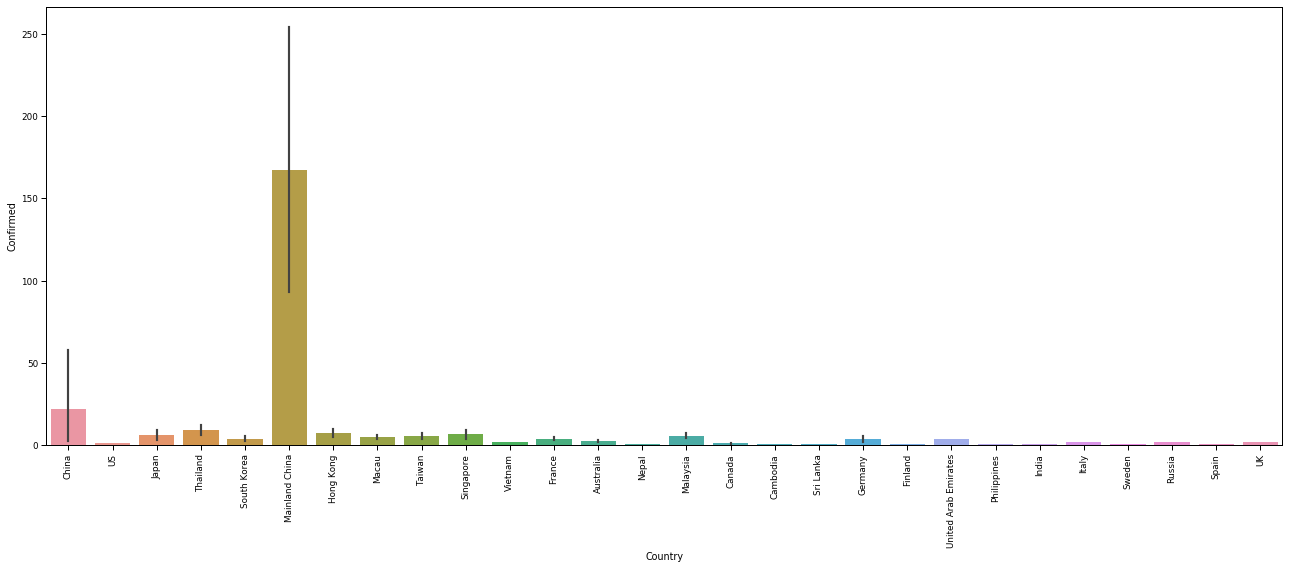

In [91]:
plt.figure(figsize=(18,8))
sns.barplot(x='Country',y='Confirmed',data=df)
plt.xticks(rotation=90)
plt.tight_layout()

На данном графике участвуют переменные по количеству подтвержденных случаев заболевания короновирусом (Confirmed) и страны мира (Country)

Цель: показать на графике страну/страны, с наибольшим количеством подтвержденных случаев заболевания короновирусом.

Как мы видим, короновирус больше всего затронул Китай (эпидемия), а так же  имеются относительно значимое количество случаев в соседних с Китаем странах, что говорит о распространении короновируса.

In [92]:
import plotly.express as px
fig = px.bar(df, x='Province/State', y='Confirmed')
fig.show()

На данном графике участвуют переменные по количеству подтвержденных случаев заболевания короновирусом (Confirmed) и регионы (Province/State)

Цель: показать на графике эпицентр распорстранения короновируса.

Как мы видим, эпиценторм распорстранения короновируса является провинция Китая - Хунань.

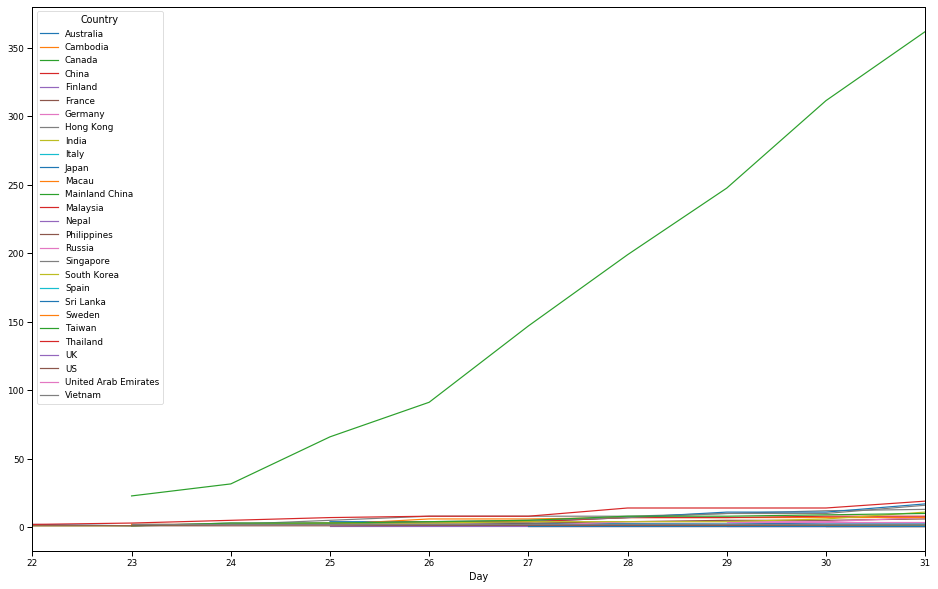

In [93]:
pivoted = pd.pivot_table(df, values='Confirmed', columns='Country', index='Day')
pivoted.plot(figsize=(16,10));

На данном графике участвуют переменные по дням (Day), по количеству подтвержденных случаев заболевания короновирусом (Confirmed) и каждая линия показывает страну (Country)

Цель: проаналилзировать рост заболевающих короновирусом в каждой стране.

Как мы видим, значительным ростом короновируса выделяется только материковом Китае (Mainland China)


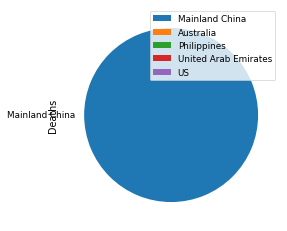

In [94]:
deaths = df.groupby(['Country']).sum().sort_values(by='Deaths', ascending=False).head(5)
deaths.plot(kind='pie', y='Deaths')

На данном графике участвуют переменные по количеству смертей от короновируса (Deaths) и первый 5 стран (Country).

Цель: проаналилзировать где больше всего умерло людей от короновируса.

Как мы видим, 100% всех смертей пришлось только на материковый Китай (Mainland China). В других странах смертей от короновируса не зарегистрировано

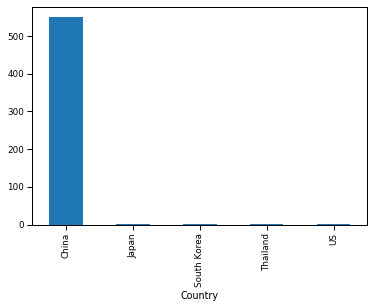

In [95]:
temp = df[df['Day'] == 22]
temp.groupby('Country').sum()['Confirmed'].plot.bar()

На данном графике участвуют переменные по количеству подтвержденных случаев заболевания короновирусом (Confirmed) и первый 5 стран (Country), в которые проник короновирус.

Цель: проаналилзировать какие страны изначально были затронуты короновирусом, в первый день выявления. Т.е. потенциально опасные страны для посещения.

Как мы видим, в первый день, 22 января 2020 г. заражения были обнаружены в Китае, Японии, Южной Корее, Таиланде и США